In [1]:
# import the modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
pd.set_option('display.max_columns', None)
train.head()

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,z_F,z_High School,Student,12,Private,"$5,900",1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,2533,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,z_F,Masters,Home Maker,33,Private,"$24,470",16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,9169,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,z_F,Bachelors,Manager,53,Private,"$17,260",13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,4174,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,z_F,z_High School,z_Blue Collar,29,Commercial,"$6,180",4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,10150,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,M,z_High School,Professional,5,Commercial,"$9,870",1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8241 non-null   int64  
 1   ID          8241 non-null   int64  
 2   KIDSDRIV    8241 non-null   int64  
 3   AGE         8235 non-null   float64
 4   HOMEKIDS    8241 non-null   int64  
 5   YOJ         7799 non-null   float64
 6   INCOME      7779 non-null   object 
 7   PARENT1     8241 non-null   object 
 8   HOME_VAL    7783 non-null   object 
 9   MSTATUS     8241 non-null   object 
 10  GENDER      8241 non-null   object 
 11  EDUCATION   8241 non-null   object 
 12  OCCUPATION  7711 non-null   object 
 13  TRAVTIME    8241 non-null   int64  
 14  CAR_USE     8241 non-null   object 
 15  BLUEBOOK    8241 non-null   object 
 16  TIF         8241 non-null   int64  
 17  CAR_TYPE    8241 non-null   object 
 18  RED_CAR     8241 non-null   object 
 19  OLDCLAIM    8241 non-null  

### Clean and visualize the data

- Remove the '$' and `,` sign from all the columns.
- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.
- Visualize the distribution of the target variable.

In [5]:
train.corr()

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
Unnamed: 0,1.000000,0.007481,0.001099,0.029593,-0.009973,0.004444,-0.013907,-0.006503,0.006200,0.003025,0.005679,-0.007216
ID,0.007481,1.000000,-0.008499,-0.001992,-0.000626,-0.019556,0.004866,-0.017859,-0.001256,0.000960,0.002140,-0.002985
KIDSDRIV,0.001099,-0.008499,1.000000,-0.078517,0.462011,0.046078,0.014851,-0.005300,0.043340,0.051921,-0.054408,0.067292
AGE,0.029593,-0.001992,-0.078517,1.000000,-0.428446,0.127934,0.003857,-0.006355,-0.031229,-0.074465,0.163663,-0.047112
HOMEKIDS,-0.009973,-0.000626,0.462011,-0.428446,1.000000,0.079626,0.003373,0.010615,0.040866,0.069481,-0.157015,0.069923
YOJ,0.004444,-0.019556,0.046078,0.127934,0.079626,1.000000,-0.008517,0.020993,-0.015297,-0.042937,0.055171,-0.016618
TRAVTIME,-0.013907,0.004866,0.014851,0.003857,0.003373,-0.008517,1.000000,-0.015989,0.009785,0.013628,-0.031434,0.042425
TIF,-0.006503,-0.017859,-0.005300,-0.006355,0.010615,0.020993,-0.015989,1.000000,-0.021340,-0.036186,0.002248,-0.050506
CLM_FREQ,0.006200,-0.001256,0.043340,-0.031229,0.040866,-0.015297,0.009785,-0.021340,1.000000,0.405115,-0.021817,0.148269
MVR_PTS,0.003025,0.000960,0.051921,-0.074465,0.069481,-0.042937,0.013628,-0.036186,0.405115,1.000000,-0.040169,0.147199


In [6]:
train.drop(['Unnamed: 0','ID'], axis = 1, inplace = True)

In [7]:
# remove $ and , in below data from given columns

cata_var = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for i in cata_var:
    (train[i].replace({'\$':'', ',':''}, regex = True, inplace = True))

train[cata_var] = train[cata_var].astype('float')

In [8]:
# check missing values in train
print(pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/7211)*100}))


            total_missing  perc_missing
KIDSDRIV                0      0.000000
AGE                     6      0.083206
HOMEKIDS                0      0.000000
YOJ                   442      6.129524
INCOME                462      6.406878
PARENT1                 0      0.000000
HOME_VAL              458      6.351408
MSTATUS                 0      0.000000
GENDER                  0      0.000000
EDUCATION               0      0.000000
OCCUPATION            530      7.349882
TRAVTIME                0      0.000000
CAR_USE                 0      0.000000
BLUEBOOK                0      0.000000
TIF                     0      0.000000
CAR_TYPE                0      0.000000
RED_CAR                 0      0.000000
OLDCLAIM                0      0.000000
CLM_FREQ                0      0.000000
REVOKED                 0      0.000000
MVR_PTS                 0      0.000000
CLM_AMT                 0      0.000000
CAR_AGE               515      7.141867
CLAIM_FLAG              0      0.000000


In [9]:
train.groupby(['OCCUPATION','CLAIM_FLAG']).size().unstack()

CLAIM_FLAG,0,1
OCCUPATION,,
Clerical,815,457
Doctor,194,73
Home Maker,439,220
Lawyer,586,242
Manager,759,261
Professional,765,370
Student,411,299
z_Blue Collar,1093,727


In [10]:
train.drop(['OCCUPATION'], axis = 1, inplace = True)

In [11]:
train['AGE'].fillna(train['AGE'].median(), inplace = True)
train['YOJ'].fillna(train['YOJ'].median(), inplace = True)
train['INCOME'].fillna(train['INCOME'].median(), inplace = True)
train['HOME_VAL'].fillna(train['HOME_VAL'].median(), inplace = True)
train['CAR_AGE'].fillna(train['CAR_AGE'].median(), inplace = True)

In [12]:
train.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,1,42.0,3,9.0,4701.0,No,0.0,Yes,z_F,z_High School,12,Private,5900.0,1,Sports Car,no,0.0,0,No,4,0.0,9.0,1
1,0,50.0,0,7.0,10232.0,No,129979.0,Yes,z_F,Masters,33,Private,24470.0,16,Minivan,no,5458.0,2,No,3,0.0,18.0,0
2,0,40.0,2,17.0,66200.0,Yes,223960.0,z_No,z_F,Bachelors,53,Private,17260.0,13,z_SUV,no,0.0,0,No,1,629.0,9.0,1
3,2,38.0,2,13.0,34056.0,No,122908.0,Yes,z_F,z_High School,29,Commercial,6180.0,4,Sports Car,no,502.0,1,No,5,0.0,2.0,0
4,0,38.0,0,11.0,45734.0,No,222653.0,Yes,M,z_High School,5,Commercial,9870.0,1,Pickup,no,3296.0,1,No,3,2156.0,2.0,1


0    5414
1    2827
Name: CLAIM_FLAG, dtype: int64


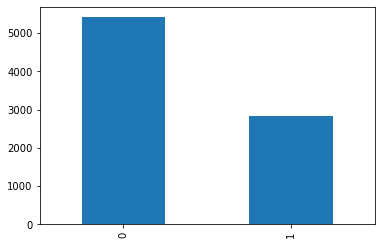

In [13]:
print(train['CLAIM_FLAG'].value_counts())
train['CLAIM_FLAG'].value_counts().plot(kind = 'bar')
plt.show()

In [14]:
cata_var_ls = train.select_dtypes(exclude = 'number').columns
le = LabelEncoder()
for i in cata_var_ls:
    train[i] = le.fit_transform(train[i])

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [15]:
# Code Starts here
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("For random forest classifier : \n")
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1 score: ',f1_score(y_test, y_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

model = LogisticRegression()

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)
print(score)
print("For logistic regression : \n")
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1 score: ',f1_score(y_test, y_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))
# Code ends here

For random forest classifier : 

Accuracy:  0.8277395875454913
Precision:  0.808282208588957
Recall:  0.6364734299516909
f1 score:  0.7121621621621621
Confusion Matrix:  [[1520  125]
 [ 301  527]]
0.7970076829761423
For logistic regression : 

Accuracy:  0.7970076829761423
Precision:  0.8122605363984674
Recall:  0.5120772946859904
f1 score:  0.6281481481481481
Confusion Matrix:  [[1547   98]
 [ 404  424]]


In [16]:
# Deal with Imbalanced Data

# Instantiate SMOTE 
smote = SMOTE(random_state=9)

# fit smote on training set
X_train, y_train = smote.fit_sample(X_train, y_train)
print(y_train.value_counts())

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('f1 score: ',f1_score(y_test, y_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

0    3769
1    3769
Name: CLAIM_FLAG, dtype: int64
Accuracy:  0.8281439547108774
Precision:  0.8076335877862595
Recall:  0.6388888888888888
f1 score:  0.7134187457855697
Confusion Matrix:  [[1519  126]
 [ 299  529]]


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [17]:
test = pd.read_csv('../data/test.csv')

id_ = test['ID']

test.drop(['Unnamed: 0','ID', 'OCCUPATION'], axis = 1, inplace = True)

for i in cata_var:
    (test[i].replace({'\$':'', ',':''}, regex = True, inplace = True))

test[cata_var] = test[cata_var].astype('float')
    
test['AGE'].fillna(test['AGE'].median(), inplace = True)
test['YOJ'].fillna(test['YOJ'].median(), inplace = True)
test['INCOME'].fillna(test['INCOME'].median(), inplace = True)
test['HOME_VAL'].fillna(test['HOME_VAL'].median(), inplace = True)
test['CAR_AGE'].fillna(test['CAR_AGE'].median(), inplace = True)

cata_var_ls = test.select_dtypes(exclude = 'number').columns
for i in cata_var_ls:
    test[i] = le.fit_transform(test[i])

In [18]:
# Code Starts here

res = rf.predict(test)

# ss = pd.read_csv('sample_submission.csv')

# ss['Unnamed: 0'] = id_
# ss['CLAIM_FLAG'] = res

# submission = ss.to_csv('submission.csv', index = False)
# Code ends here